<a href="https://colab.research.google.com/github/georgeaaron7/ML/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input Data

In [1]:
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]

In [2]:
b = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0]

In [3]:
c = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 1, 1, 1, 0]

Creating labels

In [4]:
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Visualizing the data

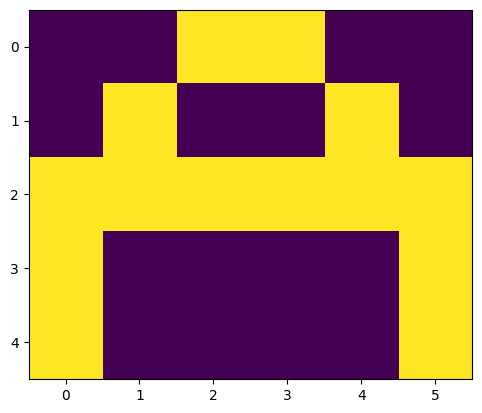

In [7]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

converting data and labels into numpy array

In [9]:
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]
y = np.array(y)
print(x ,"\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


Activation function

In [48]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

creating a feed forward neural network

In [49]:
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

intializing the weights

In [50]:
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

loss function

In [51]:
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

Back propogation

In [52]:
def back_prop(x, y, w1, w2, alpha):

    # hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))

    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))

    return(w1, w2)

In [54]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

In [55]:
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [56]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-6.38274979e-02 -1.82275135e+00  5.93861689e-01 -6.78781113e-01
   2.73618659e+00]
 [-7.33378137e-02  5.36053912e-01  4.56430397e-01  3.98014338e-01
  -8.25053066e-01]
 [-6.13970302e-01 -8.70223832e-01 -9.12013680e-01 -1.43574247e+00
  -6.30729986e-01]
 [-8.96563610e-03  2.93008149e+00 -7.93344870e-01  1.14427999e+00
  -1.13007840e+00]
 [ 2.37001021e-01 -8.19289674e-02 -4.57488621e-01 -3.83678802e-01
  -4.21878170e-01]
 [ 2.38487643e+00  2.34756526e-01 -5.49631531e-01 -1.03076918e+00
  -1.49595805e-01]
 [ 1.45461521e-01  1.15457664e+00  2.18792108e+00 -4.32074692e-02
   1.16968560e+00]
 [ 3.63155850e-01 -8.19273871e-02  7.04225596e-01 -8.19385182e-01
  -1.31807423e+00]
 [-1.91844955e+00  6.84425018e-01 -1.69965948e+00  4.27733228e-01
   4.27071581e-01]
 [ 1.22172839e+00 -5.65990826e-01 -3.31071925e+00  1.65562086e-01
  -1.76434447e+00]
 [ 9.52264856e-01  1.23164406e+00 -6.10596468e-01  9.73172689e-01
   4.92243689e-01]
 [-1.85245749e+00 -1.10639916e-01 -9.21234400e-01  1.23189035e+00

In [57]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 76.51470962772632
epochs: 2 ======== acc: 77.25589444879283
epochs: 3 ======== acc: 77.93535699069393
epochs: 4 ======== acc: 78.55576465675642
epochs: 5 ======== acc: 79.12067978760521
epochs: 6 ======== acc: 79.63442357644321
epochs: 7 ======== acc: 80.101736182872
epochs: 8 ======== acc: 80.52748470799494
epochs: 9 ======== acc: 80.91645366978852
epochs: 10 ======== acc: 81.27320104875595
epochs: 11 ======== acc: 81.60196202890161
epochs: 12 ======== acc: 81.9065898896388
epochs: 13 ======== acc: 82.19052771222405
epochs: 14 ======== acc: 82.4568054039507
epochs: 15 ======== acc: 82.70805612431967
epochs: 16 ======== acc: 82.94654600018188
epochs: 17 ======== acc: 83.1742115057553
epochs: 18 ======== acc: 83.39269991700418
epochs: 19 ======== acc: 83.60340950473146
epochs: 20 ======== acc: 83.80752733282264
epochs: 21 ======== acc: 84.0060635215574
epochs: 22 ======== acc: 84.19988156894136
epochs: 23 ======== acc: 84.38972480904056
epochs: 24 ======== acc: 8

plotting accuracy

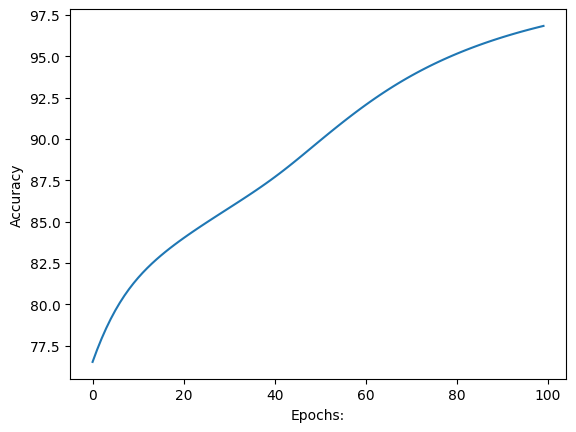

In [58]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

plotting loss

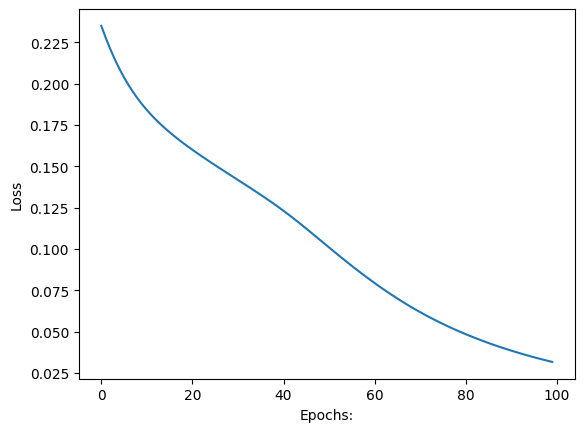

In [59]:
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [62]:
print(w1, "\n", w2)

[[-0.0638275  -1.82275135  0.59386169 -0.67878111  2.73618659]
 [-0.63702112  0.85984121  0.83061696  0.27842994 -0.82410595]
 [-0.65509127 -0.82545733 -0.52985668 -1.59689906 -0.6628048 ]
 [-0.0500866   2.97484798 -0.41118787  0.9831234  -1.16215321]
 [-0.32668228  0.24185833 -0.08330206 -0.5032632  -0.42093106]
 [ 2.38487643  0.23475653 -0.54963153 -1.03076918 -0.1495958 ]
 [ 0.14546152  1.15457664  2.18792108 -0.04320747  1.1696856 ]
 [ 0.32203488 -0.03716089  1.08638259 -0.98054177 -1.35014904]
 [-1.91844955  0.68442502 -1.69965948  0.42773323  0.42707158]
 [ 1.22172839 -0.56599083 -3.31071925  0.16556209 -1.76434447]
 [ 0.943629    0.92325808 -0.78427625  1.70623551  0.45917601]
 [-1.85245749 -0.11063992 -0.9212344   1.23189035 -0.22159384]
 [ 0.89947215 -1.47057583  0.13523803  0.82070655 -1.20703946]
 [-1.09222711  1.21242087 -1.06739306 -0.23728676  1.01582669]
 [ 0.6087808  -0.3081232  -1.13670626  0.31372899 -0.46051568]
 [ 0.13066252 -0.96159928  0.4486972   2.39665933 -2.35

Image is of letter C.


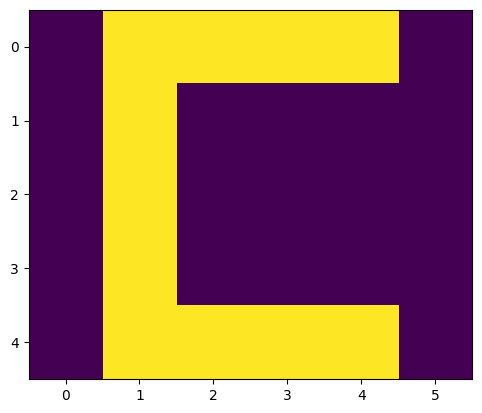

In [61]:
predict(x[2], w1, w2)